# Problem Statement
* The primary goal of this project is to employ advanced data analytics and machine learning methods to perform customer segmentation for a retail business.
* Customer segmentation is a critical task for understanding and effectively targeting different customer groups. **This problem falls within the realm of Classification Machine Learning** as it involves categorizing customers into distinct segments based on various attributes and behaviors. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
customer_segment_data = pd.read_csv('/kaggle/input/customer-segmentation-kmeans-clusering/Mall_Customers.csv') 


In [3]:
customer_segment_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print('The size of Dataframe is: ', customer_segment_data.shape)
print('The Column Name, Record Count and Data Types are as follows: ')
customer_segment_data.info()

The size of Dataframe is:  (200, 5)
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in customer_segment_data.columns if customer_segment_data[feature].dtype != 'O']
categorical_features = [feature for feature in customer_segment_data.columns if customer_segment_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 4 numerical features : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

We have 1 categorical features : ['Gender']


In [6]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
total=customer_segment_data.isnull().sum().sort_values(ascending=False)
percent=(customer_segment_data.isnull().sum()/customer_segment_data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


Missing Value Presence in different columns of DataFrame are as follows : 


,Total,Percent
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0


In [7]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
customer_segment_data.describe()


Summary Statistics of numerical features for DataFrame are as follows:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
customer_segment_data.describe(include='object').T

Summary Statistics of categorical features for DataFrame are as follows:


,count,unique,top,freq
Gender,200,2,Female,112


In [9]:
X = customer_segment_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [11]:
scaler.fit(X)


StandardScaler()

In [12]:
standardized_data = scaler.transform(X)
standardized_data


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [13]:
X = standardized_data
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Using .score() method

In [14]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
scores = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    scores.append(K_Means.fit(X).score(X))


In [15]:
scores

[-400.0,
 -270.02616084451506,
 -157.70400815035947,
 -108.9213166136436,
 -65.5684081557168,
 -55.05734827038599,
 -45.33255486071674,
 -37.24595372674167,
 -33.854106217363686]

### Elbow Curve (Number of Clusters Vs Score)


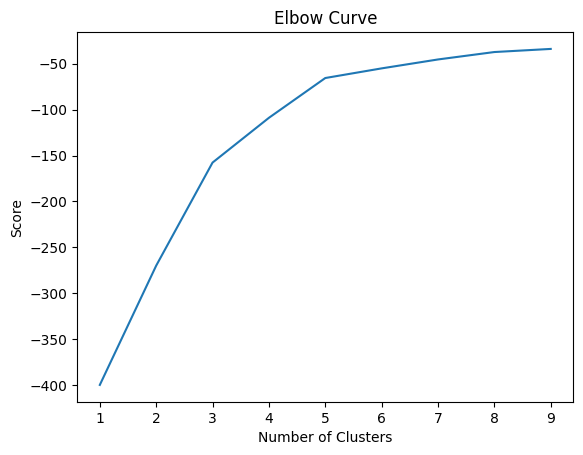

In [16]:
plt.plot(cluster_iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()

* Inference
Optimal number of clusters for Customer Segmentation = 5


### Using .inertia_ method (Within-Cluster Sum of Sqaures)

In [17]:
from sklearn.cluster import KMeans

cluster_iteration = range(1,10)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    inertias.append(K_Means.inertia_)
inertias


[400.0,
 270.02616084451506,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 45.33255486071674,
 37.24595372674166,
 33.854106217363686]

### Elbow Curve (Number of Clusters Vs Inertia)


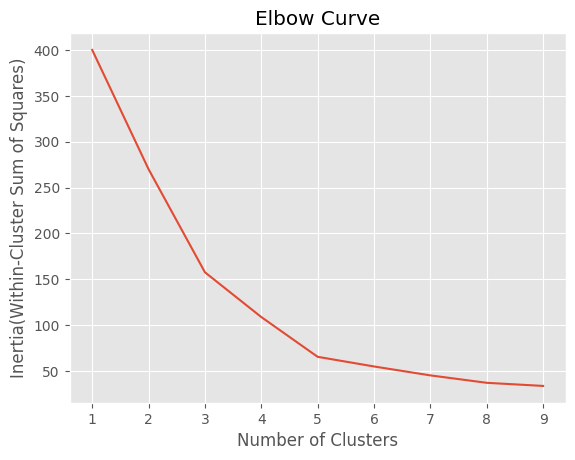

In [18]:
plt.plot(cluster_iteration,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia(Within-Cluster Sum of Squares)')
plt.title('Elbow Curve')
plt.xticks(cluster_iteration)
plt.style.use('ggplot')
plt.show()


* Inference
Optimal number of clusters for Customer Segmentation = 5


### Using Silhouette Score Method

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_iteration = range(2,10)  # Start from at least 2 clusters (Silhouette Score Requirement)
inertias = []

for cluster_number in cluster_iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    clustered_labels = K_Means.labels_
    
    silhouette_avg = silhouette_score(X,clustered_labels)
    print(f'For n_clusters={cluster_number}, the Silhouette score is {silhouette_avg}')


For n_clusters=2, the Silhouette score is 0.29847884543636577
For n_clusters=3, the Silhouette score is 0.46658474419000145
For n_clusters=4, the Silhouette score is 0.4939069237513199
For n_clusters=5, the Silhouette score is 0.5546571631111091
For n_clusters=6, the Silhouette score is 0.5398800926790663
For n_clusters=7, the Silhouette score is 0.5317107324040978
For n_clusters=8, the Silhouette score is 0.45317028376017787
For n_clusters=9, the Silhouette score is 0.45528744061049026


In [20]:
# Clustering for final model
K_Means_final_model = KMeans(n_clusters= 5, random_state=45)
K_Means_final_model.fit(X)

KMeans(n_clusters=5, random_state=45)

In [21]:
#Create a cluster label column in the original DataFrame
cluster_labels = K_Means_final_model.labels_

In [22]:
cluster_labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [23]:
customer_segment_data['cluster'] = cluster_labels
customer_segment_data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


In [24]:
customer_segment_data.groupby('cluster').agg({'Annual Income (k$)': 'mean',
                            'Spending Score (1-100)': ['mean', 'count'],}).round(0)


Annual Income (k$) Spending Score (1-100)      
                      mean                   mean count
cluster                                                
0                     88.0                   17.0    35
1                     55.0                   50.0    81
2                     26.0                   21.0    23
3                     26.0                   79.0    22
4                     87.0                   82.0    39

In [25]:
Y = cluster_labels
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

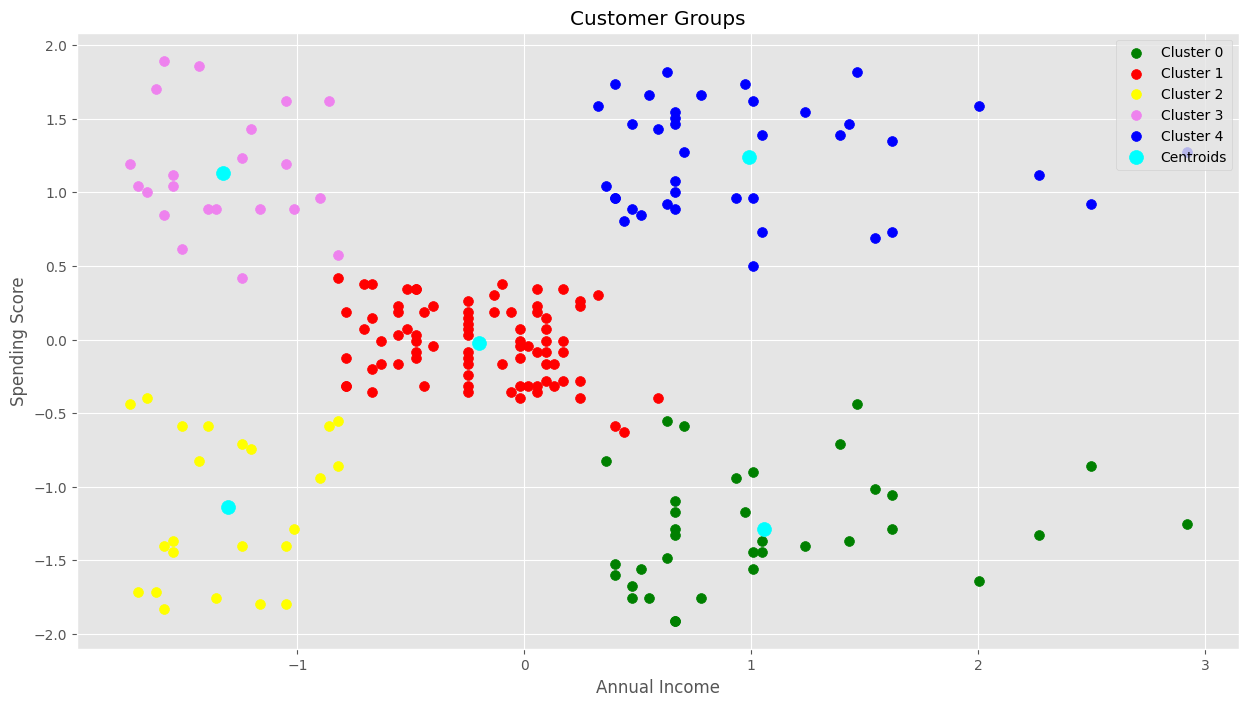

In [26]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 0')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 4')

# plot the centroids
plt.scatter(K_Means_final_model.cluster_centers_[:,0], K_Means_final_model.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.legend(loc='upper right')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


# Inference
The customer segmentation analysis reveals distinct customer groups based on annual income and spending behavior :

* Cluster 0 represents a balanced segment with moderate income and spending scores.
* Cluster 1 consists of customers with lower incomes but high spending scores, making them potential targets for promotions.
* Cluster 2 comprises high-income individuals with high spending scores, ideal for premium offerings.
* Cluster 3, with high incomes but low spending, presents an opportunity to encourage increased spending.
* Cluster 4 encompasses customers with low incomes and conservative spending habits.

These findings enable businesses to tailor marketing strategies, product offerings, and promotions to better meet the unique needs of each segment, ultimately enhancing customer satisfaction and optimizing revenue generation.